In [98]:
import numpy as np, sys, os
from gensim import corpora
import gensim
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [65]:
import importlib, logging
importlib.reload(logging)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [241]:
# Create corpus dataframe
corpus_df = pd.concat([pd.DataFrame([[os.path.splitext(i)[0], ' '.join(np.load('corpus/' + i))]], columns=['arxiv_id', 'text']) 
           for i in os.listdir('corpus') if i.endswith('.npy')], ignore_index=True)

# Remove papers with fewer than 100 tokens (any higher will remove actual papers such as 0705.3177 and 0709.0460)
# as these did not get converted correctly with latexml
doc_lens = [len(d) for d in corpus_tokens]
min_indices = [i for i, v in enumerate(doc_lens) if v < 100]
print('Dropping ' + str(len(min_indices)) + ' papers...')
corpus_df = corpus_df.drop(corpus_df.index[min_indices])
corpus_df.reset_index(drop=True)

Dropping 21 papers...


,arxiv_id,text
0,0704.0009,the serpens star forming cloud is one of five ...
1,0704.0017,ex hya is an intermediate polar ip a sub class...
2,0704.0023,the chromosphere remains the least understood ...
3,0704.0048,the data obtained from lisa will contain a lar...
4,0704.0059,solving for the masses and radii of stars has ...
5,0704.0080,introduction the mass functions of star cluste...
6,0704.0094,timing is a unique technique to establish the ...
7,0704.0128,the data from the swift satellite gehrels et a...
8,0704.0133,redshifts <latex> <num> <num> witness both the...
9,0704.0138,the space based gravitational wave detector li...


In [242]:
# Get tokens array for each file
corpus_tokens = [doc.split() for doc in corpus_df['text']]
len(corpus_tokens)

5062

In [300]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(corpus_tokens)
dictionary

In [244]:
# Create corpus iterable to manage memory
class MyCorpus(object):
    def __iter__(self):
        for doc in corpus_df['text']:
            # Assume there's one document per line, tokens separated by whitespace
            yield dictionary.doc2bow(doc.split())

In [245]:
corpus = MyCorpus()

In [302]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                      id2word=dictionary,
                                      num_topics=10,
                                      update_every=1,
                                      chunksize=10000,
                                      passes=1)

In [291]:
print(lda.print_topics(num_topics=10, num_words=50))

[(0, '0.022*"pft" + 0.017*"balqso" + 0.015*"qbh" + 0.015*"selfdual" + 0.014*"pg05a" + 0.013*"eurybates" + 0.013*"j195509" + 0.013*"x41" + 0.013*"pseudogap" + 0.012*"j0644" + 0.012*"jeg" + 0.012*"vsl" + 0.012*"sfir" + 0.011*"wd2" + 0.011*"vd17" + 0.011*"testimator" + 0.011*"bcm" + 0.011*"x42" + 0.011*"v228" + 0.010*"23gal" + 0.010*"gfm05" + 0.009*"slomass" + 0.009*"15e" + 0.009*"4inthe" + 0.009*"coms" + 0.009*"weyssenhoff" + 0.009*"a115n" + 0.009*"luss" + 0.009*"tkachenko" + 0.009*"cac" + 0.009*"qbhs" + 0.008*"cmmsm" + 0.008*"mc8" + 0.008*"acrobat" + 0.008*"lsqfit" + 0.008*"rbec" + 0.008*"gyrochronology" + 0.008*"kdpg" + 0.008*"eeos" + 0.008*"j1836" + 0.007*"selfduality" + 0.007*"j065051" + 0.007*"picsit" + 0.007*"wifes" + 0.007*"j065043" + 0.007*"bmh05" + 0.007*"s15g" + 0.007*"lavalsb" + 0.007*"0v" + 0.007*"a115s"'), (1, '0.036*"2dfs" + 0.024*"kelt" + 0.022*"ags05" + 0.021*"kctf" + 0.021*"seho" + 0.020*"mwg" + 0.020*"nirgs" + 0.018*"zippering" + 0.017*"cb54yc1" + 0.017*"calvera" + 0.01

In [301]:
print(len(dictionary))
print(len(corpus_tokens))
print(len(doc_lens))

89817
5062
5062


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


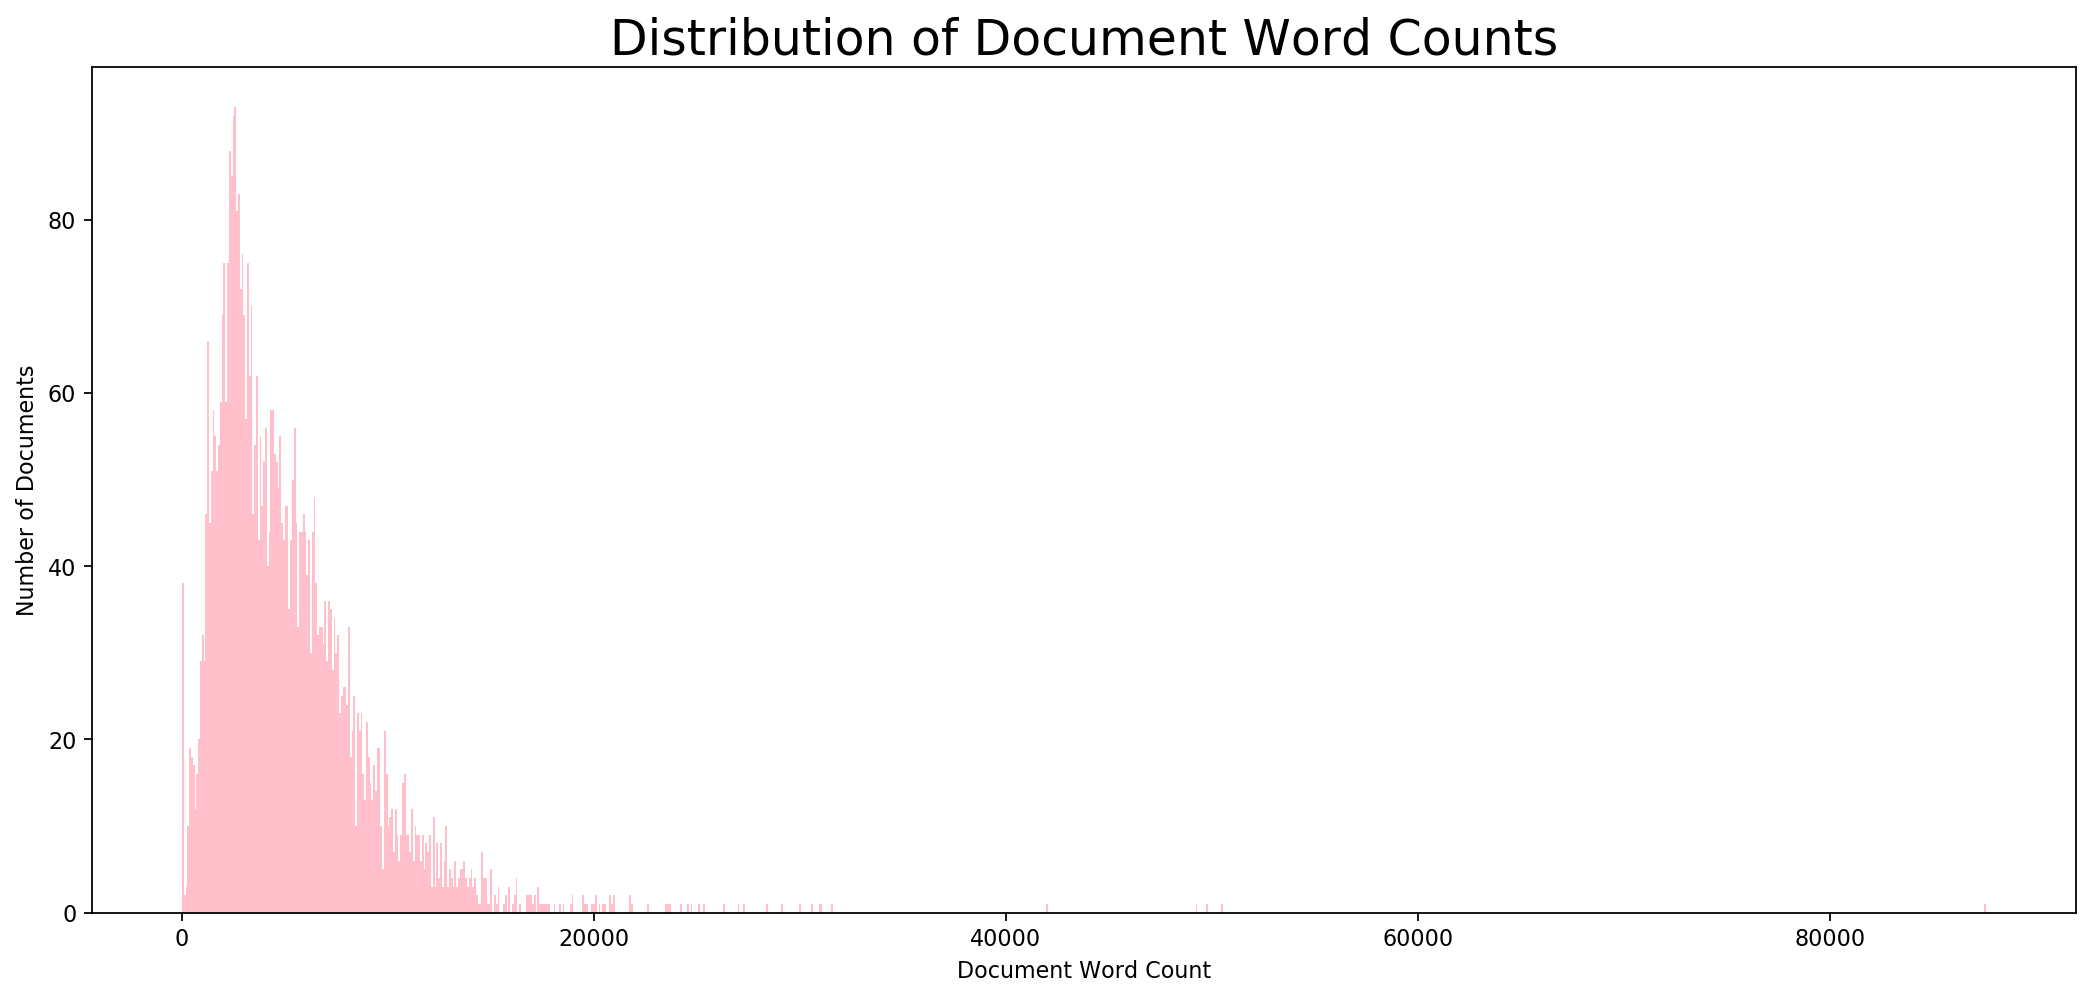

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


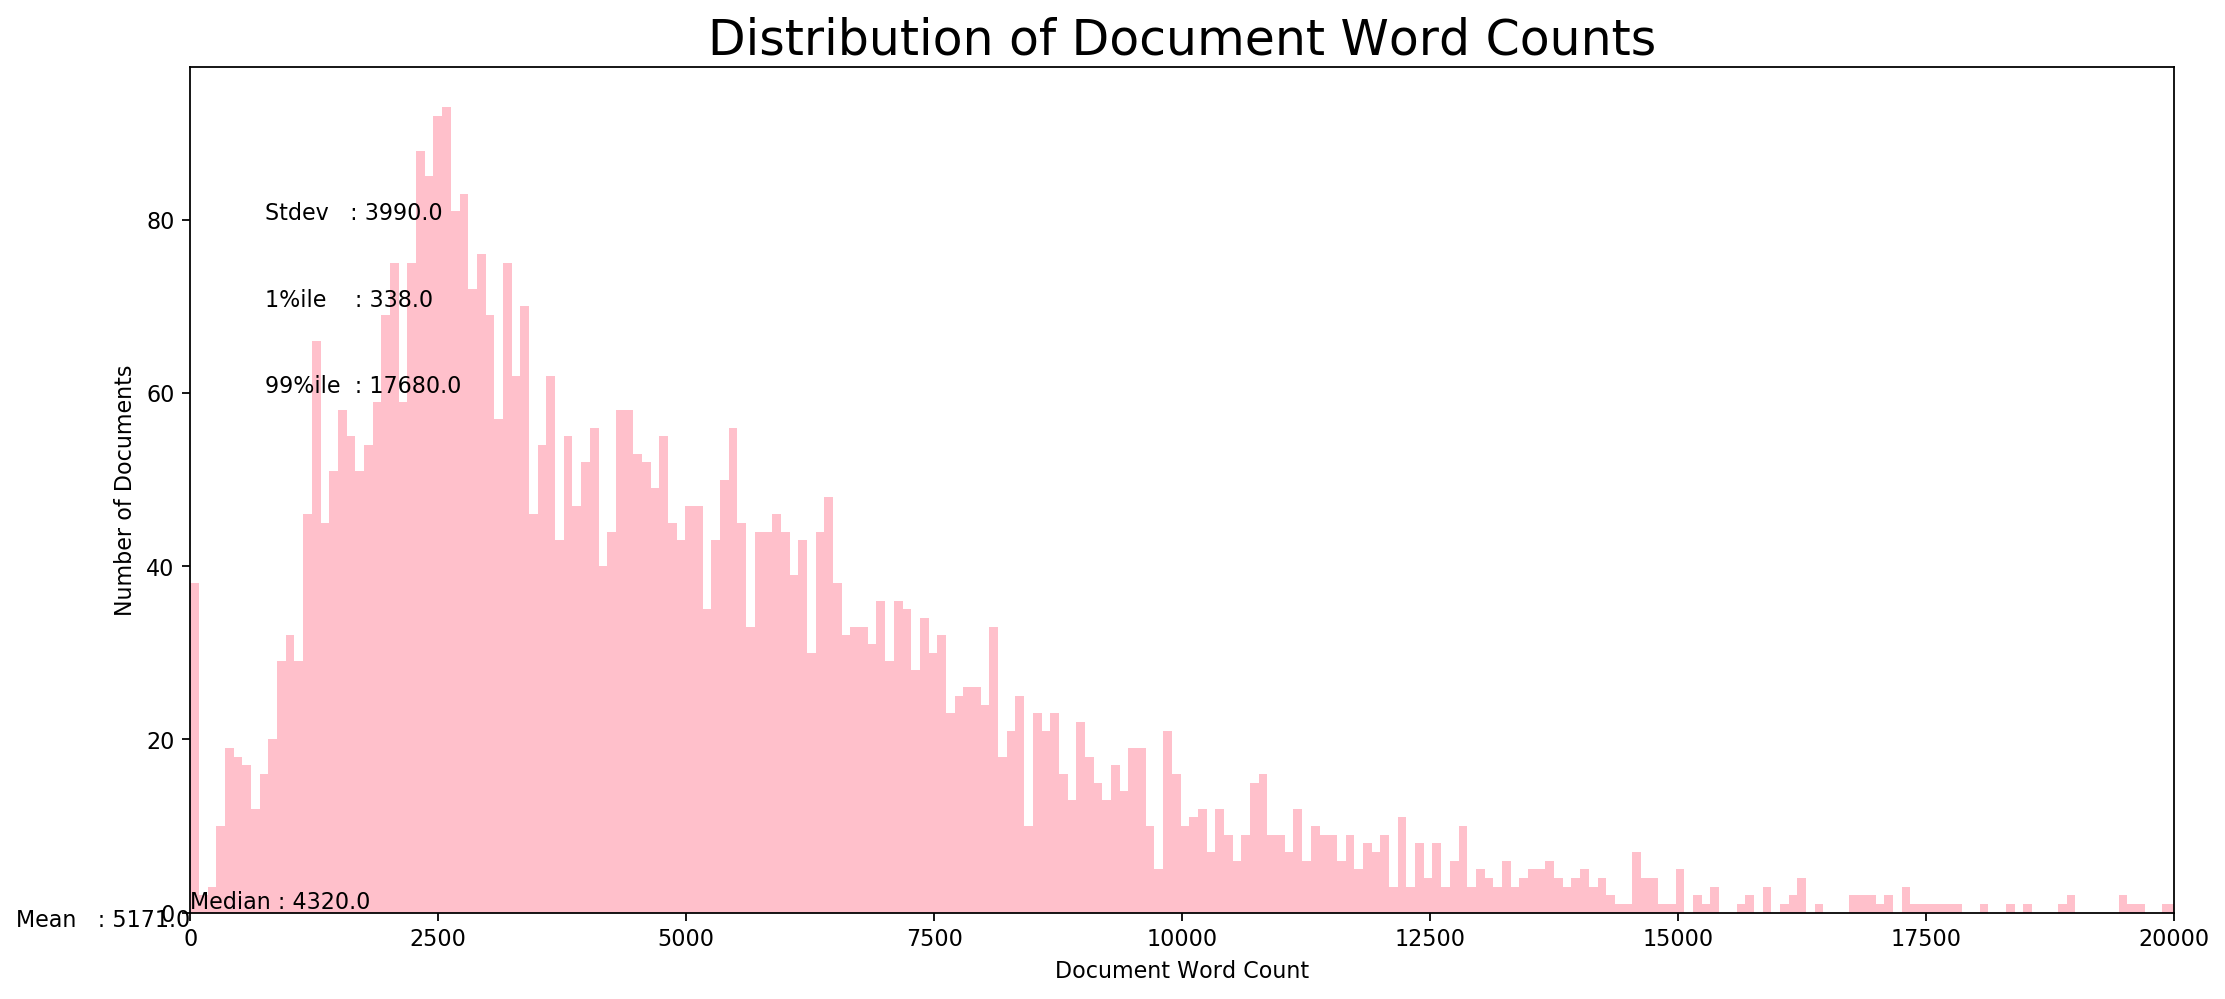

In [275]:
# VISUALIZE HOW BIG THE PAPERS ARE 
doc_lens = [len(d) for d in corpus_tokens]
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins=1000, color='pink')
plt.gca().set(ylabel='Number of Documents', xlabel='Document Word Count')
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins=1000, color='pink')
plt.text(0.5, 0.5, "Mean   : " + str(round(np.mean(doc_lens))), verticalalignment='top', horizontalalignment='right')
plt.text(0.5,  0.5, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))
plt.gca().set(xlim=(0, 20000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

# Removing most frequent words

In [283]:
tfidf = gensim.models.TfidfModel(corpus, id2word=dictionary)

In [299]:
for bow in corpus:
    for value in tfidf[bow]:
        print(value)

(0, 1.0)
(1, 1.0)
(2, 1.0)
(3, 1.0)
(4, 0.4206760390361345)
(5, 0.9072109292666554)
(6, 1.0)
(7, 1.0)
(8, 1.0)
(9, 0.0020506442249981875)
(10, 0.9999978974269208)
(11, 1.0)
(12, 1.0)
(13, 1.0)
(14, 1.0)
(15, 1.0)
(16, 0.9334848462417668)
(17, 0.3586168454450867)
(18, 1.0)
(19, 1.0)
(20, 1.0)
(21, 0.4874267693205318)
(22, 0.873163870387311)
(23, 0.5516566969421695)
(24, 0.8340712731648628)
(25, 1.0)
(26, 1.0)
(27, 1.0)
(28, 0.9612696918926567)
(29, 0.2756094690836961)
(30, 1.0)
(31, 1.0)
(32, 1.0)
(33, 1.0)
(34, 1.0)
(35, 1.0)
(36, 1.0)
(37, 1.0)
(38, 1.0)
(39, 0.18223471602346286)
(40, 0.983255057589763)
(41, 1.0)
(42, 1.0)
(43, 1.0)
(44, 1.0)
(45, 1.0)
(46, 1.0)
(47, 1.0)
(48, 1.0)
(49, 1.0)
(50, 1.0)
(51, 1.0)
(52, 1.0)
(53, 1.0)
(54, 1.0)
(55, 1.0)
(56, 1.0)
(57, 1.0)
(58, 0.0006438169836884806)
(59, 0.9943309094579824)
(60, 0.10632792669921254)
(61, 1.0)
(62, 1.0)
(63, 1.0)
(64, 1.0)
(65, 0.7430314925122533)
(66, 0.6692564539360178)
(67, 1.0)
(68, 1.0)
(69, 0.4115805889407327)
(70,

(499, 0.5809187158085447)
(500, 0.29940321438526446)
(501, 0.7568957397416918)
(502, 1.0)
(503, 1.0)
(504, 1.0)
(505, 1.0)
(506, 1.0)
(507, 1.0)
(508, 1.0)
(509, 0.8142272387212864)
(510, 0.5805462976579123)
(511, 1.0)
(512, 1.0)
(513, 1.0)
(514, 1.0)
(515, 1.0)
(516, 1.0)
(517, 0.9899540659805386)
(518, 0.14138934630515698)
(519, 1.0)
(520, 1.0)
(521, 1.0)
(522, 1.0)
(523, 1.0)
(524, 1.0)
(525, 0.5077443311609211)
(526, 0.8615078027353837)
(527, 1.0)
(528, 0.9315923854021403)
(529, 0.3635046457210005)
(530, 1.0)
(531, 1.0)
(532, 1.0)
(533, 1.0)
(534, 1.0)
(535, 0.9999981907019457)
(536, 0.0019022599282641124)
(537, 1.0)
(538, 0.4016210924554566)
(539, 0.9158059281828687)
(540, 1.0)
(541, 1.0)
(542, 1.0)
(543, 0.06368694633535134)
(544, 0.9979699258326765)
(243, 1.0)
(545, 1.0)
(546, 1.0)
(547, 1.0)
(548, 0.8564786264832392)
(549, 0.5161824894137577)
(550, 1.0)
(551, 1.0)
(552, 1.0)
(553, 1.0)
(554, 0.6483187710023077)
(555, 0.7613690111674217)
(556, 1.0)
(557, 1.0)
(558, 1.0)
(559, 0.

(941, 1.0)
(942, 0.7023138772002929)
(943, 0.7118674159503943)
(944, 0.9700421992629329)
(945, 0.24293647657182427)
(946, 0.32638471838186495)
(947, 0.7543703208239934)
(948, 0.5695598604771023)
(949, 1.0)
(950, 1.0)
(951, 1.0)
(952, 1.0)
(953, 1.0)
(954, 1.0)
(955, 1.0)
(956, 0.8484527191922248)
(957, 0.5292711812439062)
(958, 1.0)
(959, 0.37217332939670367)
(960, 0.9281632468945172)
(961, 0.6899572113394331)
(962, 0.7238501547424803)
(963, 1.0)
(964, 1.0)
(965, 1.0)
(966, 0.8325764909592128)
(967, 0.19816431068299448)
(968, 0.5172497391720728)
(969, 1.0)
(970, 0.8561967918962772)
(971, 0.516649836491335)
(972, 0.7065218804858509)
(973, 0.6218065202366477)
(974, 0.3379104671150753)
(427, 1.0)
(795, 0.24911829133295532)
(796, 0.9415387897409054)
(975, 0.2268144270909149)
(524, 1.0)
(976, 1.0)
(977, 0.9720156211434952)
(978, 0.23491622390338487)
(979, 1.0)
(624, 1.0)
(980, 1.0)
(981, 1.0)
(982, 1.0)
(983, 1.0)
(984, 1.0)
(985, 1.0)
(986, 1.0)
(987, 1.0)
(988, 0.7195849766654207)
(989, 0

(1376, 1.0)
(1377, 1.0)
(1378, 1.0)
(1379, 1.0)
(1380, 1.0)
(1381, 1.0)
(1382, 1.0)
(1383, 1.0)
(1384, 1.0)
(1385, 0.9598239436391611)
(1386, 0.280602917335099)
(1387, 0.13122317624494828)
(1388, 0.9913528524275235)
(1389, 1.0)
(1390, 1.0)
(1391, 0.9666345304869153)
(1392, 0.2032104592559036)
(1393, 0.15595894882739322)
(1291, 1.0)
(1394, 1.0)
(1395, 1.0)


In [293]:
low_value = 0.05
low_value_words = []
for bow in corpus:
    low_value_words += [id for id, value in tfidf[bow] if value < low_value]

In [294]:
# Filter low-value words out of dictionary
dictionary.filter_tokens(bad_ids=low_value_words)

## Recommending papers with LDA

In [303]:
corpora.MmCorpus.serialize('SerializedCorpus.mm', corpus)
SerializedCorpus = corpora.MmCorpus('SerializedCorpus.mm')
lda_display = pyLDAvis.gensim.prepare(lda, SerializedCorpus, dictionary, sort_topics=False)
#pyLDAvis.save_html(vis_data,outpth+'LDA_Visualization.html')
pyLDAvis.display(lda_display)

KeyboardInterrupt: 

In [320]:
doc = corpus_df.iloc[0].text
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lda = lda[vec_bow]  # convert the query to LDA space
print(vec_lda)


[(0, 0.108506046), (1, 0.02448022), (2, 0.3849651), (3, 0.055340115), (4, 0.04498104), (5, 0.06804825), (7, 0.07220269), (8, 0.16675095), (9, 0.06685031)]


In [322]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Prepare for similarity queries
index = gensim.similarities.Similarity(corpus=lda[corpus], num_features=len(dictionary), output_prefix='similarities') # using Similarity instead of MatrixSimilarity due to memory
# index.save('similarities.index')

In [323]:
# Obtain similarity of our query against our indexed papers
sims = index[vec_lda]  # perform a similarity query against the corpus
print(list(enumerate(sims)))  # print (document_number, document_similarity) 2-tuples

[(0, 0.99442685), (1, 0.6211318), (2, 0.7009346), (3, 0.20347425), (4, 0.7102888), (5, 0.25829202), (6, 0.22165217), (7, 0.5104571), (8, 0.66891706), (9, 0.15706307), (10, 0.59238416), (11, 0.08689807), (12, 0.5703656), (13, 0.8627517), (14, 0.16462281), (15, 0.79554474), (16, 0.15178756), (17, 0.62685275), (18, 0.5866891), (19, 0.9739746), (20, 0.96223235), (21, 0.6814616), (22, 0.28636417), (23, 0.11833093), (24, 0.3407045), (25, 0.18465884), (26, 0.17823994), (27, 0.23004708), (28, 0.96877295), (29, 0.14906539), (30, 0.9029006), (31, 0.3682529), (32, 0.5236852), (33, 0.7074783), (34, 0.6497597), (35, 0.97173536), (36, 0.24265236), (37, 0.86969924), (38, 0.59843224), (39, 0.38972598), (40, 0.9602117), (41, 0.88079995), (42, 0.9557548), (43, 0.2688068), (44, 0.8312324), (45, 0.9560262), (46, 0.27320242), (47, 0.7187598), (48, 0.39870372), (49, 0.5079375), (50, 0.4372487), (51, 0.09803088), (52, 0.15071213), (53, 0.17788188), (54, 0.853574), (55, 0.67650217), (56, 0.1319629), (57, 0.14

/Users/briennakh/anaconda3/envs/gl-env/lib/python3.7/site-packages/gensim/similarities/docsim.py:528: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.hstack(shard_results)


In [324]:
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims)  # print sorted (document number, similarity score) 2-tuples

[(2027, 0.9956573), (0, 0.99442685), (4456, 0.98994887), (249, 0.9889825), (1010, 0.98866224), (4662, 0.98833627), (3477, 0.9871902), (4005, 0.98600537), (4360, 0.9847261), (3678, 0.9840274), (730, 0.9836889), (3124, 0.9836481), (4357, 0.983458), (2854, 0.98327124), (2985, 0.98280525), (3255, 0.982538), (3099, 0.9825033), (3422, 0.982411), (3524, 0.9817847), (974, 0.98139393), (724, 0.9812952), (513, 0.9811848), (1429, 0.98101485), (1329, 0.9794426), (2410, 0.9793628), (598, 0.97927), (4924, 0.97868943), (3148, 0.9785446), (2748, 0.97851974), (1287, 0.97845966), (265, 0.9783464), (1039, 0.97815275), (585, 0.9775993), (3502, 0.9775802), (1990, 0.9774481), (75, 0.97725195), (2174, 0.9769855), (389, 0.9764579), (2251, 0.9764225), (4837, 0.9762192), (3167, 0.9761665), (172, 0.976003), (2636, 0.9759722), (4113, 0.9759606), (322, 0.9758017), (357, 0.97579455), (4474, 0.97560406), (4100, 0.9754299), (3085, 0.9752833), (4377, 0.974688), (2672, 0.9746368), (3537, 0.97437125), (2269, 0.9741194),

In [325]:
corpus_df.iloc[[2027]]

,arxiv_id,text
2039,0706.1809,introduction the spitzer legacy science progra...


In [326]:
corpus_df.iloc[[0]]

,arxiv_id,text
0,0704.0009,the serpens star forming cloud is one of five ...


Query was: https://arxiv.org/pdf/0704.0009.pdf

Result was: https://arxiv.org/pdf/0706.1809.pdf

They are similar!

## Extra

In [276]:
# Find dominant topic of each document and its percentage contribution in the document
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=MyCorpus(), texts=dictionary)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,48.0,0.1375,"the, <num>, of, in, <latex>, and, to, a, is, with",0
1,1,64.0,0.2087,"the, of, <latex>, <num>, and, a, in, to, is, that",1
2,2,7.0,0.3479,"the, of, <num>, in, <latex>, and, to, a, is, for",2
3,3,43.0,0.3800,"the, <latex>, of, in, and, to, is, a, <num>, for",3
4,4,7.0,0.1815,"the, of, <num>, in, <latex>, and, to, a, is, for",4
5,5,75.0,0.5230,"the, of, <latex>, in, a, and, is, to, <num>, we",5
6,6,43.0,0.2866,"the, <latex>, of, in, and, to, is, a, <num>, for",6
7,7,51.0,0.1256,"the, <num>, of, to, and, in, <latex>, a, for, is",7
8,8,32.0,0.3493,"the, <num>, of, and, <latex>, is, to, a, in, for",8
9,9,90.0,0.6471,"the, <latex>, of, in, to, a, and, is, we, for",9


In [277]:
for idx, topic in lda.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.071*"the" + 0.052*"<latex>" + 0.029*"<num>" + 0.028*"of" + 0.024*"and" + 0.024*"in" + 0.017*"a" + 0.014*"to" + 0.013*"for" + 0.013*"is"


Topic: 1 
Words: 0.057*"the" + 0.038*"<num>" + 0.034*"<latex>" + 0.026*"of" + 0.025*"in" + 0.021*"and" + 0.017*"to" + 0.015*"is" + 0.014*"a" + 0.010*"we"


Topic: 2 
Words: 0.092*"the" + 0.040*"of" + 0.036*"<num>" + 0.021*"and" + 0.021*"<latex>" + 0.020*"to" + 0.019*"a" + 0.017*"in" + 0.014*"that" + 0.013*"is"


Topic: 3 
Words: 0.064*"the" + 0.029*"of" + 0.026*"<latex>" + 0.025*"<num>" + 0.021*"to" + 0.020*"in" + 0.019*"a" + 0.018*"and" + 0.015*"is" + 0.011*"that"


Topic: 4 
Words: 0.063*"the" + 0.047*"<num>" + 0.032*"of" + 0.023*"<latex>" + 0.018*"in" + 0.017*"and" + 0.014*"that" + 0.014*"is" + 0.014*"a" + 0.013*"to"


Topic: 5 
Words: 0.073*"the" + 0.043*"of" + 0.041*"<num>" + 0.027*"<latex>" + 0.024*"in" + 0.022*"a" + 0.017*"to" + 0.015*"is" + 0.015*"and" + 0.011*"that"


Topic: 6 
Words: 0.073*"the" + 0.034*"of" + 0.029*"<num

In [280]:
x=lda.show_topics(num_topics=10, num_words=100,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

#Below Code Prints Only Words 
for topic,words in topics_words:
    print(" ".join(words))

0::['the', '<latex>', '<num>', 'of', 'and', 'in', 'a', 'to', 'for', 'is', 'that', 'by', 'we', 'with', 'are', 'be', 'at', 'on', 'as', 'this', 'it', 'can', 'which', 'have', 'from', 'an', 'et', 'not', 'al', 'field', 'these', 'where', 'mass', 'than', 'model', 'energy', 'also', 'our', 'density', 'stars', 's', 'h', 'time', 'or', 'two', 'more', 'i', 'see', 'will', 'using', 'one', 'data', 'all', 'large', 'has', 'if', 'galaxies', 'gas', 'e', 'such', 'between', 'but', 'emission', 'magnetic', 'observed', 'line', 'only', 'was', 'range', 'high', 'were', 'value', 'star', 'may', 'used', 'figure', 'due', 'found', 'other', 'been', 'x', 'their', 'case', 'values', 'however', 'spectrum', 'when', 'both', 'sources', 'very', 'would', 'm', 'cluster', 'its', 'number', 'results', 'while', 'fig', 'region', 'source']
1::['the', '<num>', '<latex>', 'of', 'in', 'and', 'to', 'is', 'a', 'we', 'with', 'that', 'by', 'are', 'et', 'al', 'for', 'be', 'as', 'from', 'on', 'at', 'this', 'galaxies', 'have', 'which', 'stars', 

In [109]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from collections import Counter
topics = lda.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()